In [1]:
import pandas as pd
import random
from KNNClassifier import KNNClassifier
from metrics import score

In [2]:
dataframe = pd.read_csv(r"datasets/sentiment_prime.csv",sep=';')
dataframe = dataframe[['wordcount', 'titleSentiment', 'sentimentValue', 'Star Rating']]

In [3]:
dataframe.head()

,wordcount,titleSentiment,sentimentValue,Star Rating
0,23,0.0,-0.486389,1
1,20,0.0,-0.586187,1
2,4,0.0,-0.602240,1
3,17,0.0,-0.616271,1
4,6,0.0,-0.651784,1


Mean wordcount:  12.216216216216216


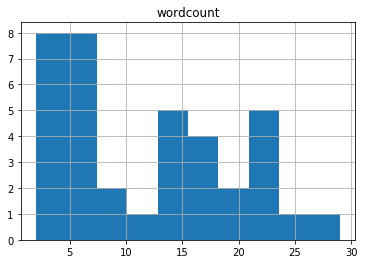

In [4]:
one_star = dataframe[dataframe['Star Rating']==1]
one_star.hist(column = 'wordcount')
print(f"Mean wordcount: ", one_star['wordcount'].mean())

In [5]:
x = dataframe[['wordcount', 'titleSentiment', 'sentimentValue']].values.tolist()
y = list(map(lambda x: x[0], dataframe[['Star Rating']].values.tolist()))

In [6]:
TRAIN_SIZE = 0.6
K = 5

In [7]:
# Sample
c = list(zip(x, y))
random.seed(0)
random.shuffle(c)
x, y = zip(*c)
lim = int(TRAIN_SIZE * len(x))

x_train = x[:lim]
x_test = x[lim:]
y_train = y[:lim]
y_test = y[lim:]

print("Train size:", len(x_train))
print("Test size:", len(x_test))

Train size: 154
Test size: 103


In [8]:
knn = KNNClassifier(K = K)
knn.fit(x_train, y_train)

* Class: 1
Accuracy 0.79612 | Precision 0.36842 | Recall 0.43750 | TP-rate 0.43750 | FP-rate 0.13793 | F1 0.40000 

* Class: 2
Accuracy 0.97087 | Precision 0.75000 | Recall 1.00000 | TP-rate 1.00000 | FP-rate 0.03191 | F1 0.85714 

* Class: 3
Accuracy 0.72816 | Precision 0.46667 | Recall 0.53846 | TP-rate 0.53846 | FP-rate 0.20779 | F1 0.50000 

* Class: 4
Accuracy 0.86408 | Precision 0.66667 | Recall 0.35294 | TP-rate 0.35294 | FP-rate 0.03488 | F1 0.46154 

* Class: 5
Accuracy 0.92233 | Precision 0.90909 | Recall 0.85714 | TP-rate 0.85714 | FP-rate 0.04412 | F1 0.88235 

HARMONIC MEANS

    Accuracy: 0.84732
    Precision: 0.56880
    Recall: 0.54688
    TP rate: 0.54688
    FP rate: 0.05278
    F1 score: 0.55762


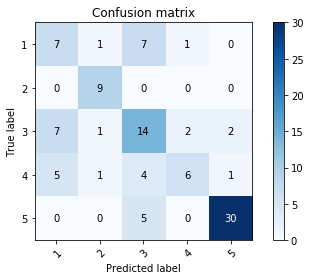

In [9]:
score(knn, x_test, y_test, classes = [1,2,3,4,5], confusion_matrix=True)

* Class: 1
Accuracy 0.89320 | Precision 0.69231 | Recall 0.56250 | TP-rate 0.56250 | FP-rate 0.04598 | F1 0.62069 

* Class: 2
Accuracy 0.92233 | Precision 0.52941 | Recall 1.00000 | TP-rate 1.00000 | FP-rate 0.08511 | F1 0.69231 

* Class: 3
Accuracy 0.80583 | Precision 0.60000 | Recall 0.69231 | TP-rate 0.69231 | FP-rate 0.15584 | F1 0.64286 

* Class: 4
Accuracy 0.89320 | Precision 0.87500 | Recall 0.41176 | TP-rate 0.41176 | FP-rate 0.01163 | F1 0.56000 

* Class: 5
Accuracy 0.90291 | Precision 0.85714 | Recall 0.85714 | TP-rate 0.85714 | FP-rate 0.07353 | F1 0.85714 

HARMONIC MEANS

    Accuracy: 0.88155
    Precision: 0.68404
    Recall: 0.63959
    TP rate: 0.63959
    FP rate: 0.03584
    F1 score: 0.66107


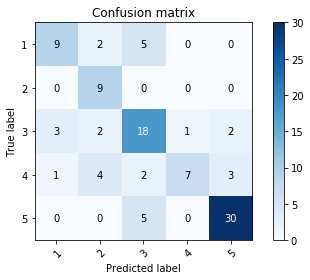

In [10]:
knn_weighted = KNNClassifier(K = K, weight_f='euclidean')
knn_weighted.fit(x_train, y_train)
score(knn_weighted, x_test, y_test, classes = [1,2,3,4,5], confusion_matrix=True)

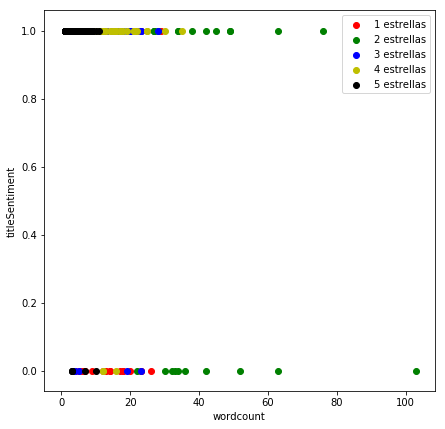

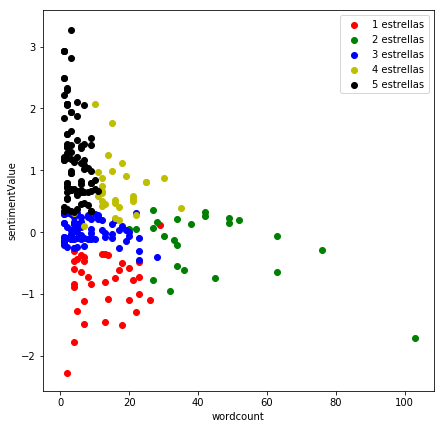

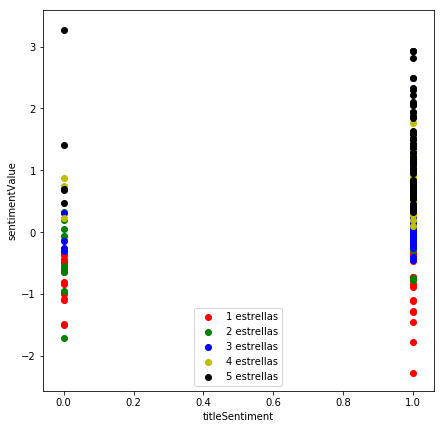

In [11]:
import matplotlib.pyplot as plt

pairs = [
    ['wordcount', 'titleSentiment'],
    ['wordcount', 'sentimentValue'],
    ['titleSentiment', 'sentimentValue']
]

for pair in pairs:
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    for i, m, cl in [(1, '.', 'red'), (2, '.', 'g'), (3, '.', 'b'), (4, '.', 'y'), (5, '.', 'k')]:
        filtered = dataframe[dataframe['Star Rating']==i]
        xy = filtered[pair].values.tolist()
        xs = [v[0] for v in xy]
        ys = [v[1] for v in xy]
        ax.scatter(xs, ys, c=cl, label = f'{i} estrellas')
        ax.legend(loc = 'best')
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])

plt.show()

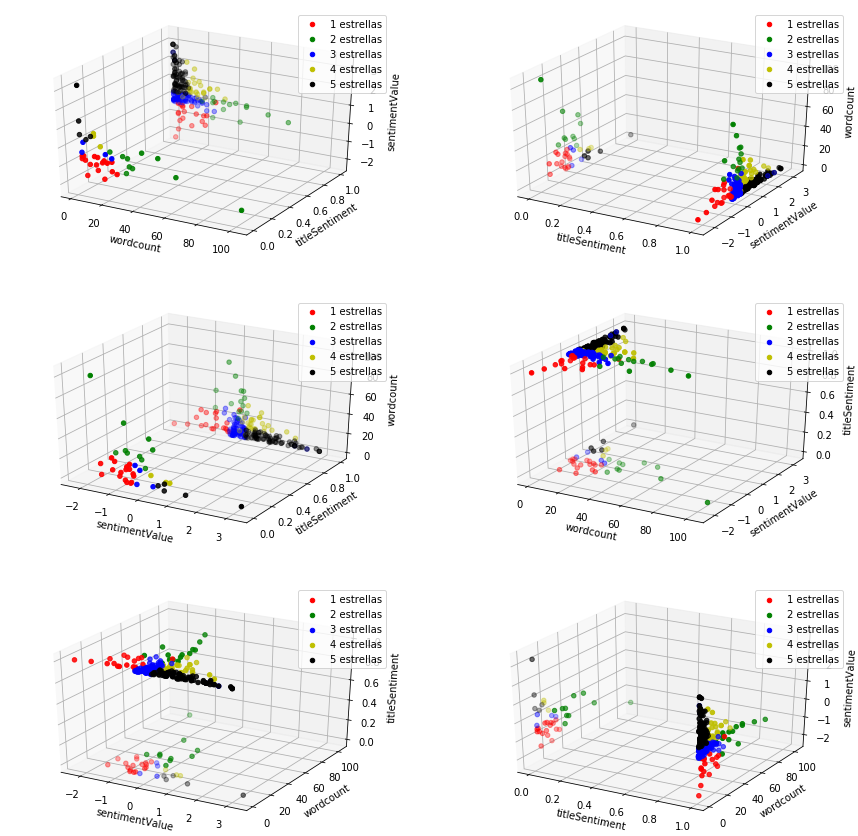

In [12]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
subplots = [321, 322, 323, 324, 325, 326]
dimensions = ['wordcount', 'titleSentiment', 'sentimentValue']
j = 0
for p in [[0,1,2], [1,2,0], [2,1,0], [0,2,1], [2,0,1], [1,0,2]]:
    ax = fig.add_subplot(subplots[j], projection='3d')
    j += 1
    for i, m, cl in [(1, 'o', 'red'), (2, 'o', 'g'), (3, 'o', 'b'), (4, 'o', 'y'), (5, 'o', 'k')]:
        filtered = dataframe[dataframe['Star Rating']==i]
        xyz = filtered[dimensions].values.tolist()
        xs = [v[p[0]] for v in xyz]
        ys = [v[p[1]] for v in xyz]
        zs = [v[p[2]] for v in xyz]
        ax.scatter(xs, ys, zs, c=cl, label = f'{i} estrellas')
        ax.legend(loc='best')

    ax.set_xlabel(dimensions[p[0]])
    ax.set_ylabel(dimensions[p[1]])
    ax.set_zlabel(dimensions[p[2]])

plt.show()

* Class: 1
Accuracy 0.76699 | Precision 0.21429 | Recall 0.18750 | TP-rate 0.18750 | FP-rate 0.12644 | F1 0.20000 

* Class: 2
Accuracy 0.97087 | Precision 0.75000 | Recall 1.00000 | TP-rate 1.00000 | FP-rate 0.03191 | F1 0.85714 

* Class: 3
Accuracy 0.57282 | Precision 0.26316 | Recall 0.38462 | TP-rate 0.38462 | FP-rate 0.36364 | F1 0.31250 

* Class: 4
Accuracy 0.85437 | Precision 0.66667 | Recall 0.23529 | TP-rate 0.23529 | FP-rate 0.02326 | F1 0.34783 

* Class: 5
Accuracy 0.65049 | Precision 0.48485 | Recall 0.45714 | TP-rate 0.45714 | FP-rate 0.25000 | F1 0.47059 

HARMONIC MEANS

    Accuracy: 0.73667
    Precision: 0.37418
    Recall: 0.32529
    TP rate: 0.32529
    FP rate: 0.05618
    F1 score: 0.34803


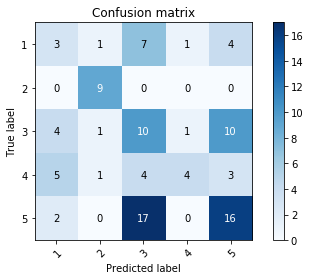

In [13]:
x_train_3 = [[x_i[0], x_i[1]] for x_i in x_train]
x_test_3 = [[x_i[0], x_i[1]] for x_i in x_test]
knn3 = KNNClassifier(K = K)
knn3.fit(x_train_3, y_train)
score(knn3, x_test_3, y_test, classes = [1,2,3,4,5], confusion_matrix=True)

154
* Class: 1
Accuracy 0.80583 | Precision 0.40000 | Recall 0.50000 | TP-rate 0.50000 | FP-rate 0.13793 | F1 0.44444 

* Class: 2
Accuracy 0.96117 | Precision 0.72727 | Recall 0.88889 | TP-rate 0.88889 | FP-rate 0.03191 | F1 0.80000 

* Class: 3
Accuracy 0.75728 | Precision 0.51852 | Recall 0.53846 | TP-rate 0.53846 | FP-rate 0.16883 | F1 0.52830 

* Class: 4
Accuracy 0.89320 | Precision 0.87500 | Recall 0.41176 | TP-rate 0.41176 | FP-rate 0.01163 | F1 0.56000 

* Class: 5
Accuracy 0.90291 | Precision 0.83784 | Recall 0.88571 | TP-rate 0.88571 | FP-rate 0.08824 | F1 0.86111 

HARMONIC MEANS

    Accuracy: 0.85778
    Precision: 0.61425
    Recall: 0.58550
    TP rate: 0.58550
    FP rate: 0.03525
    F1 score: 0.59953


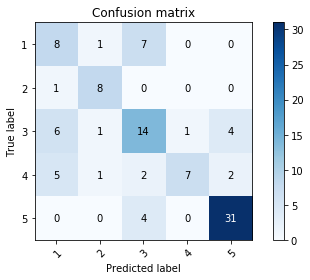

In [14]:
x_train_2 = [[x_i[0], x_i[2]] for x_i in x_train]
x_test_2 = [[x_i[0], x_i[2]] for x_i in x_test]
print(len(x_train_2))
knn2 = KNNClassifier(K = K)
knn2.fit(x_train_2, y_train)
score(knn2, x_test_2, y_test, classes = [1,2,3,4,5], confusion_matrix=True)

154
* Class: 1
Accuracy 0.91262 | Precision 0.70588 | Recall 0.75000 | TP-rate 0.75000 | FP-rate 0.05747 | F1 0.72727 

* Class: 2
Accuracy 0.88350 | Precision 0.00000 | Recall 0.00000 | TP-rate 0.00000 | FP-rate 0.03191 | F1 0.00000 

* Class: 3
Accuracy 0.85437 | Precision 0.66667 | Recall 0.84615 | TP-rate 0.84615 | FP-rate 0.14286 | F1 0.74576 

* Class: 4
Accuracy 0.83495 | Precision 0.50000 | Recall 0.11765 | TP-rate 0.11765 | FP-rate 0.02326 | F1 0.19048 

* Class: 5
Accuracy 0.85437 | Precision 0.71739 | Recall 0.94286 | TP-rate 0.94286 | FP-rate 0.19118 | F1 0.81481 

HARMONIC MEANS

    Accuracy: 0.86712


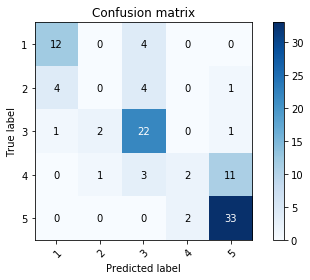

In [15]:
x_train_2 = [[x_i[1], x_i[2]] for x_i in x_train]
x_test_2 = [[x_i[1], x_i[2]] for x_i in x_test]
print(len(x_train_2))
knn2 = KNNClassifier(K = K)
knn2.fit(x_train_2, y_train)
score(knn2, x_test_2, y_test, classes = [1,2,3,4,5], confusion_matrix=True)